### Importing dataset and necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from tabulate import tabulate

import warnings 
warnings.filterwarnings('ignore')

# Setting max display columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


    Since data.info did not really provide any usefull information
    Creating a function to display all the data in form of a dataframe

In [4]:
def data_mat(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

data_mat(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
fb_user_6,float64,25153,74846,74.85,2
av_rech_amt_data_6,float64,25153,74846,74.85,887
date_of_last_rech_data_6,object,25153,74846,74.85,30
count_rech_2g_6,float64,25153,74846,74.85,31
count_rech_3g_6,float64,25153,74846,74.85,25


### Data Cleaning

In [5]:
#checking for duplicacy in dataset
data['mobile_number'].value_counts().sum()

99999

    all unique values

In [6]:
#Mobile number can work as an index since it is distict for all the users and has no missing values
data = data.set_index('mobile_number')

In [7]:
#There seems to be columns on two types
# 1 : the columns donating the information in form of numeric months and
# 2 : columns that are using name of months
# Renaming them to help make columns follow a similar naming convension
data = data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7',
                    'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)



In [8]:
data.columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'],
      dtype='object', length=225)

### Filtering High Value Customers

    Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.

In [9]:
data['Average_rech_amt_6n7']=(data['total_rech_amt_6']+data['total_rech_amt_7'])/2

In [10]:
data=data[(data['Average_rech_amt_6n7']>= data['Average_rech_amt_6n7'].quantile(0.7))]

In [11]:
data.shape

(30011, 226)

### Missing Value Treatment

In [12]:
missing_values = data_mat(data)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
av_rech_amt_data_6,float64,62.02
count_rech_2g_6,float64,62.02
arpu_2g_6,float64,62.02
max_rech_data_6,float64,62.02
night_pck_user_6,float64,62.02
date_of_last_rech_data_6,object,62.02
total_rech_data_6,float64,62.02
arpu_3g_6,float64,62.02
fb_user_6,float64,62.02
count_rech_3g_6,float64,62.02


In [13]:
#Checking and dropping columns with high missing values ( > 50%)
missing = data_mat(data)
condition = missing['Null_Percentage'] > 50 
high_missing_values = missing[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
av_rech_amt_data_6,float64,11397,18614,62.02,794
count_rech_3g_6,float64,11397,18614,62.02,25
count_rech_2g_6,float64,11397,18614,62.02,30
arpu_2g_6,float64,11397,18614,62.02,4503
max_rech_data_6,float64,11397,18614,62.02,43
night_pck_user_6,float64,11397,18614,62.02,2
date_of_last_rech_data_6,object,11397,18614,62.02,30
total_rech_data_6,float64,11397,18614,62.02,36
arpu_3g_6,float64,11397,18614,62.02,4875
fb_user_6,float64,11397,18614,62.02,2


In [14]:
high_missing_value_columns = high_missing_values.index 
data.drop(columns=high_missing_value_columns, inplace=True)

In [15]:
data_mat(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_9,float64,28307,1704,5.68,1
spl_og_mou_9,float64,28307,1704,5.68,2966
isd_og_mou_9,float64,28307,1704,5.68,908
roam_ic_mou_9,float64,28307,1704,5.68,3370
std_og_mou_9,float64,28307,1704,5.68,15900
roam_og_mou_9,float64,28307,1704,5.68,4004
std_ic_t2f_mou_9,float64,28307,1704,5.68,1971
std_og_t2c_mou_9,float64,28307,1704,5.68,1
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
std_og_t2f_mou_9,float64,28307,1704,5.68,1595


    Now the data contains information of 4 months : 6,7,8 and 9
    Missing value treatment now needs to be done month wise because data of 1 months should not affect the 2nd month

    Starting with Month 6

In [16]:
sixth_month_columns = []
for column in data.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)
missing = data_mat(data)
condition = missing.index.isin(sixth_month_columns)
sixth_month = missing[condition]
sixth_month

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_mou_6,float64,29695,316,1.05,8391
offnet_mou_6,float64,29695,316,1.05,22454
std_ic_t2f_mou_6,float64,29695,316,1.05,2033
isd_ic_mou_6,float64,29695,316,1.05,3429
ic_others_6,float64,29695,316,1.05,1227
onnet_mou_6,float64,29695,316,1.05,18813
std_ic_t2m_mou_6,float64,29695,316,1.05,6680
loc_ic_t2t_mou_6,float64,29695,316,1.05,9872
loc_ic_t2m_mou_6,float64,29695,316,1.05,16015
loc_ic_t2f_mou_6,float64,29695,316,1.05,4817


    -All the columns with *_mou have exactly 316 rows with missing values.
    -This is an indicator of a meaningful missing values.

    -Refering to data dict *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that these customers not using calling plans.
    
    -This could confirmed by looking at 'total_og_mou_6' and 'total_ic_mou_6' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.

In [17]:
sixth_month_meaningful_missing_condition = sixth_month['Null_Percentage'] == 1.05
sixth_month_meaningful_missing_cols = sixth_month[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['std_ic_mou_6', 'offnet_mou_6', 'std_ic_t2f_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'onnet_mou_6', 'std_ic_t2m_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'og_others_6', 'spl_og_mou_6',
       'roam_ic_mou_6', 'spl_ic_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2c_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'std_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2o_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'loc_og_t2t_mou_6',
       'isd_og_mou_6', 'roam_og_mou_6', 'loc_og_mou_6'], dtype=object)

In [18]:
# Looking at all sixth month columns where rows of *_mou are null
condition = data[sixth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in sixth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


    This suggest the above hypothesies that the *_mou are indeed meaningull and missing values can be imputed with 0

In [19]:
# Imputation
data[sixth_month_meaningful_missing_cols] = data[sixth_month_meaningful_missing_cols].fillna(0)

missing = data_mat(data)

# Remaining Missing Values
missing.iloc[missing.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,object,29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,int64,30011,0,0.00,25
sachet_2g_6,int64,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


    Proceeding with month 7 now

In [20]:
seventh_month_columns = data.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [21]:
seventh_month = missing[missing.index.isin(seventh_month_columns)]
seventh_month

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2t_mou_7,float64,29708,303,1.01,9961
og_others_7,float64,29708,303,1.01,123
loc_ic_t2f_mou_7,float64,29708,303,1.01,4897
loc_ic_t2m_mou_7,float64,29708,303,1.01,16068
loc_ic_mou_7,float64,29708,303,1.01,19030
std_ic_t2t_mou_7,float64,29708,303,1.01,4706
std_ic_t2f_mou_7,float64,29708,303,1.01,2075
std_ic_t2o_mou_7,float64,29708,303,1.01,1
std_ic_mou_7,float64,29708,303,1.01,8543
spl_ic_mou_7,float64,29708,303,1.01,93


    The same pattern follows for the 7th month as well, 
    Deciding to impute these _mou missing values with 0 

In [22]:
seventh_month_meaningful_missing_condition = seventh_month['Null_Percentage'] == 1.01
seventh_month_meaningful_missing_cols = seventh_month[seventh_month_meaningful_missing_condition].index.values
data[seventh_month_meaningful_missing_cols] = data[seventh_month_meaningful_missing_cols].fillna(0)
missing = data_mat(data)

In [23]:
missing.iloc[missing.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,object,29897,114,0.38,31
last_date_of_month_7,object,29980,31,0.10,1
total_rech_num_7,int64,30011,0,0.00,101
ic_others_7,float64,30011,0,0.00,1371
isd_ic_mou_7,float64,30011,0,0.00,3639
spl_ic_mou_7,float64,30011,0,0.00,93
total_rech_amt_7,int64,30011,0,0.00,2265
sachet_2g_7,int64,30011,0,0.00,34
monthly_3g_7,int64,30011,0,0.00,15
sachet_3g_7,int64,30011,0,0.00,27


    Proceeding with Month 8

In [24]:
eighth_month_columns = data.filter(regex="8$", axis=1).columns
missing = data_mat(data)
condition = missing.index.isin(eighth_month_columns)
eighth_month = missing[condition]
eighth_month

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_8,float64,29073,938,3.13,1
std_og_mou_8,float64,29073,938,3.13,16864
isd_og_mou_8,float64,29073,938,3.13,940
loc_ic_mou_8,float64,29073,938,3.13,18573
std_og_t2m_mou_8,float64,29073,938,3.13,13326
loc_ic_t2m_mou_8,float64,29073,938,3.13,15598
loc_og_mou_8,float64,29073,938,3.13,18885
std_og_t2t_mou_8,float64,29073,938,3.13,11781
std_og_t2f_mou_8,float64,29073,938,3.13,1627
loc_ic_t2f_mou_8,float64,29073,938,3.13,4705


    Again same pattern for _mou,
    Imputing with 0

In [25]:
eighth_month_meaningful_missing_condition = eighth_month['Null_Percentage'] == 3.13
eighth_month_meaningful_missing_cols = eighth_month[eighth_month_meaningful_missing_condition].index.values
data[eighth_month_meaningful_missing_cols] = data[eighth_month_meaningful_missing_cols].fillna(0)
missing = data_mat(data)

In [26]:
missing.iloc[missing.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,object,29417,594,1.98,31
last_date_of_month_8,object,29854,157,0.52,1
spl_ic_mou_8,float64,30011,0,0.00,85
total_rech_num_8,int64,30011,0,0.00,96
std_ic_t2f_mou_8,float64,30011,0,0.00,1941
ic_others_8,float64,30011,0,0.00,1259
std_ic_t2o_mou_8,float64,30011,0,0.00,1
std_ic_mou_8,float64,30011,0,0.00,8033
total_ic_mou_8,float64,30011,0,0.00,20096
isd_ic_mou_8,float64,30011,0,0.00,3493


    Proceeding with Month 9

In [27]:
ninth_month_columns = data.filter(regex="9$", axis=1).columns
missing = data_mat(data)
condition = missing.index.isin(ninth_month_columns)
ninth_month = missing[condition]
ninth_month

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_9,float64,28307,1704,5.68,1
spl_ic_mou_9,float64,28307,1704,5.68,287
loc_og_t2m_mou_9,float64,28307,1704,5.68,15585
og_others_9,float64,28307,1704,5.68,132
loc_og_t2c_mou_9,float64,28307,1704,5.68,1576
isd_ic_mou_9,float64,28307,1704,5.68,3329
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
spl_og_mou_9,float64,28307,1704,5.68,2966
loc_ic_t2t_mou_9,float64,28307,1704,5.68,9407
loc_og_mou_9,float64,28307,1704,5.68,18207


    Again Same Pattern for month 9  as well for _mou columns,
    Imputing with 0

In [28]:
ninth_month_meaningful_missing_condition = ninth_month['Null_Percentage'] == 5.68
ninth_month_meaningful_missing_cols = ninth_month[ninth_month_meaningful_missing_condition].index.values
data[ninth_month_meaningful_missing_cols] = data[ninth_month_meaningful_missing_cols].fillna(0)
missing = data_mat(data)

In [29]:
missing.iloc[missing.index.isin(ninth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,object,29145,866,2.89,30
last_date_of_month_9,object,29651,360,1.20,1
spl_ic_mou_9,float64,30011,0,0.00,287
total_ic_mou_9,float64,30011,0,0.00,19437
std_ic_mou_9,float64,30011,0,0.00,7745
isd_ic_mou_9,float64,30011,0,0.00,3329
ic_others_9,float64,30011,0,0.00,1284
loc_ic_mou_9,float64,30011,0,0.00,18018
std_ic_t2t_mou_9,float64,30011,0,0.00,4280
std_ic_t2m_mou_9,float64,30011,0,0.00,6168


    The column last_date_of_month_* is the last calender date of the month.
    This column should be independent of churn data.
    Deciding to impute this data with the mode values.

In [30]:
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna(data['last_date_of_month_7'].mode()[0])
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna(data['last_date_of_month_8'].mode()[0])
data['last_date_of_month_9'] = data['last_date_of_month_9'].fillna(data['last_date_of_month_9'].mode()[0])

In [31]:
missing = data_mat(data)
missing

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,object,29145,866,2.89,30
date_of_last_rech_8,object,29417,594,1.98,31
loc_og_t2o_mou,float64,29897,114,0.38,1
date_of_last_rech_7,object,29897,114,0.38,31
std_og_t2o_mou,float64,29897,114,0.38,1
loc_ic_t2o_mou,float64,29897,114,0.38,1
date_of_last_rech_6,object,29949,62,0.21,30
isd_ic_mou_6,float64,30011,0,0.00,3429
total_ic_mou_6,float64,30011,0,0.00,20602
total_ic_mou_7,float64,30011,0,0.00,20711


    Analysing the missing values now

In [32]:
print(data[data['date_of_last_rech_6'].isnull()][['date_of_last_rech_6','total_rech_amt_6','total_rech_num_6']].nunique())
print(data[data['date_of_last_rech_7'].isnull()][['date_of_last_rech_7','total_rech_amt_7','total_rech_num_7']].nunique())
print(data[data['date_of_last_rech_8'].isnull()][['date_of_last_rech_8','total_rech_amt_8','total_rech_num_8']].nunique())
print(data[data['date_of_last_rech_9'].isnull()][['date_of_last_rech_9','total_rech_amt_9','total_rech_num_9']].nunique())

date_of_last_rech_6    0
total_rech_amt_6       1
total_rech_num_6       1
dtype: int64
date_of_last_rech_7    0
total_rech_amt_7       1
total_rech_num_7       1
dtype: int64
date_of_last_rech_8    0
total_rech_amt_8       1
total_rech_num_8       1
dtype: int64
date_of_last_rech_9    0
total_rech_amt_9       1
total_rech_num_9       1
dtype: int64


In [33]:
print("\n",data[data['date_of_last_rech_6'].isnull()][['total_rech_amt_6','total_rech_num_6']].head())
print("\n",data[data['date_of_last_rech_7'].isnull()][['total_rech_amt_7','total_rech_num_7']].head())
print("\n",data[data['date_of_last_rech_8'].isnull()][['total_rech_amt_8','total_rech_num_8']].head())
print("\n",data[data['date_of_last_rech_9'].isnull()][['total_rech_amt_9','total_rech_num_9']].head())


                total_rech_amt_6  total_rech_num_6
mobile_number                                    
7001588448                    0                 0
7001223277                    0                 0
7000721536                    0                 0
7001490351                    0                 0
7000665415                    0                 0

                total_rech_amt_7  total_rech_num_7
mobile_number                                    
7000369789                    0                 0
7001967148                    0                 0
7000066601                    0                 0
7001189556                    0                 0
7002024450                    0                 0

                total_rech_amt_8  total_rech_num_8
mobile_number                                    
7000340381                    0                 0
7000608224                    0                 0
7000369789                    0                 0
7000248548                    0             

    The columns 'date_of_last_rech' do not have any value becuase there are no recharges done by the user in this month

#### Dropping columns that are unnecessary

In [34]:
missing=data_mat(data)
singular_value_cols=missing[missing['Unique_Values_Count']==1].index.values
data.drop(columns=singular_value_cols,inplace=True)
date_columns = data.filter(regex='^date.*').columns
data.drop(columns=date_columns, inplace=True)
data_mat(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,30011,0,0.0,29261
total_ic_mou_6,float64,30011,0,0.0,20602
total_ic_mou_8,float64,30011,0,0.0,20096
total_ic_mou_9,float64,30011,0,0.0,19437
spl_ic_mou_6,float64,30011,0,0.0,78
spl_ic_mou_7,float64,30011,0,0.0,93
spl_ic_mou_8,float64,30011,0,0.0,85
spl_ic_mou_9,float64,30011,0,0.0,287
isd_ic_mou_6,float64,30011,0,0.0,3429
isd_ic_mou_7,float64,30011,0,0.0,3639


#### Working on target variable now (churn)

In [35]:
data['Churn'] = 0
churned_customers = data.query('total_og_mou_9 == 0 & total_ic_mou_9 == 0 & vol_2g_mb_9 == 0 &  vol_3g_mb_9 == 0').index
data.loc[churned_customers,'Churn']=1
data['Churn'] = data['Churn'].astype('category')

In [36]:
# Churn proportions
data['Churn'].value_counts(normalize=True).to_frame()

,Churn
0,0.913598
1,0.086402


    There seems to be a huge imbalance in churn

In [37]:
churn_phase_columns = data.filter(regex='9$').columns
data.drop(columns=churn_phase_columns, inplace=True)
print('Retained Columns')
data.columns.to_frame(index=False)

Retained Columns


,0
0,arpu_6
1,arpu_7
2,arpu_8
3,onnet_mou_6
4,onnet_mou_7
5,onnet_mou_8
6,offnet_mou_6
7,offnet_mou_7
8,offnet_mou_8
9,roam_ic_mou_6


    Final shape of data after missing value treatment and tagging the churn/target variable

In [38]:
data.shape

(30011, 126)

    Fixing the datatypes to form the catagorical variables now after removal and cleaning of dataset

In [39]:
# Coverting columns with unique value < 29  as catagorical, number decided based on the data_mat output
columns=data.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=data[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and data[column].dtype in ['int','float']:
        change_to_cat.append(column)

In [40]:
# Converting all the above columns categorical data type.
data[change_to_cat]=data[change_to_cat].astype('category')

In [41]:
# Converting *sachet* variables to categorical data type 
sachet_columns = data.filter(regex='.*sachet.*', axis=1).columns.values
data[sachet_columns] = data[sachet_columns].astype('category')

In [42]:
# Converting *monthly* variables to categorical data type 
monthly_columns = data.filter(regex='.*monthly.*', axis=1).columns.values
data[monthly_columns] = data[monthly_columns].astype('category')

In [43]:
data_mat(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,30011,0,0.0,29261
total_ic_mou_7,float64,30011,0,0.0,20711
total_rech_num_8,int64,30011,0,0.0,96
total_rech_num_7,int64,30011,0,0.0,101
total_rech_num_6,int64,30011,0,0.0,102
ic_others_8,float64,30011,0,0.0,1259
ic_others_7,float64,30011,0,0.0,1371
ic_others_6,float64,30011,0,0.0,1227
isd_ic_mou_8,float64,30011,0,0.0,3493
isd_ic_mou_7,float64,30011,0,0.0,3639


### Outliers treatment

In [44]:
# List only the numeric columns
numeric_cols = data.select_dtypes(exclude=['object','category']).columns
print(numeric_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'Average_rech_amt_6n7'],
      dtype='object', length=113)


In [45]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = data[col].quantile(0.10)
    q3 = data[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    df = data.loc[(data[col] > range_low) & (data[col] < range_high)]

data = df
data.shape

(29700, 126)

#### Derive new features

In [46]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Deriving new column `decrease_mou_action`
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [47]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

#### Deriving new column `decrease_rech_num_action`
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [48]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

#### Deriving new column `decrease_rech_amt_action`
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [49]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

#### Deriving new column `decrease_arpu_action`
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [50]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

#### Deriving new column `decrease_vbc_action`
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [51]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['vbc_3g_7'] + data['vbc_3g_8'])/2
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['vbc_3g_6']
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [52]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7,Churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,1113.99,973.090,-140.900,1,6.0,1.0,0,2214.0,634.0,0,2260.6650,1191.4850,0,38.560,19.820,0
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.7

### Exploratory Data Analysis

In [53]:
data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,565.776088,566.872366,516.087637,290.566182,299.030268,262.795302,408.156326,414.545782,368.095053,16.919372,12.968231,12.721207,27.781128,20.563164,20.188789,93.702189,94.822116,85.942732,178.202894,178.623811,165.290455,6.819711,6.928000,6.387326,1.566702,1.862250,1.714108,278.733593,280.382888,257.628933,185.786936,195.971553,169.076854,198.508456,208.743118,176.580731,1.979070,2.003501,1.

In [54]:
categorical_columns = data.dtypes[data.dtypes == 'category'].index.values
print('Mode : ')
data[categorical_columns].mode().T

Mode : 


,0
monthly_2g_6,0
monthly_2g_7,0
monthly_2g_8,0
sachet_2g_6,0
sachet_2g_7,0
sachet_2g_8,0
monthly_3g_6,0
monthly_3g_7,0
monthly_3g_8,0
sachet_3g_6,0


    It Seems that for the telecome company:
    - there have been many users in -ve avg revenues for both the phases
    - Most customers seem to be prefering the plan of 0 category

#### Univariate Analysis

##### Age of network

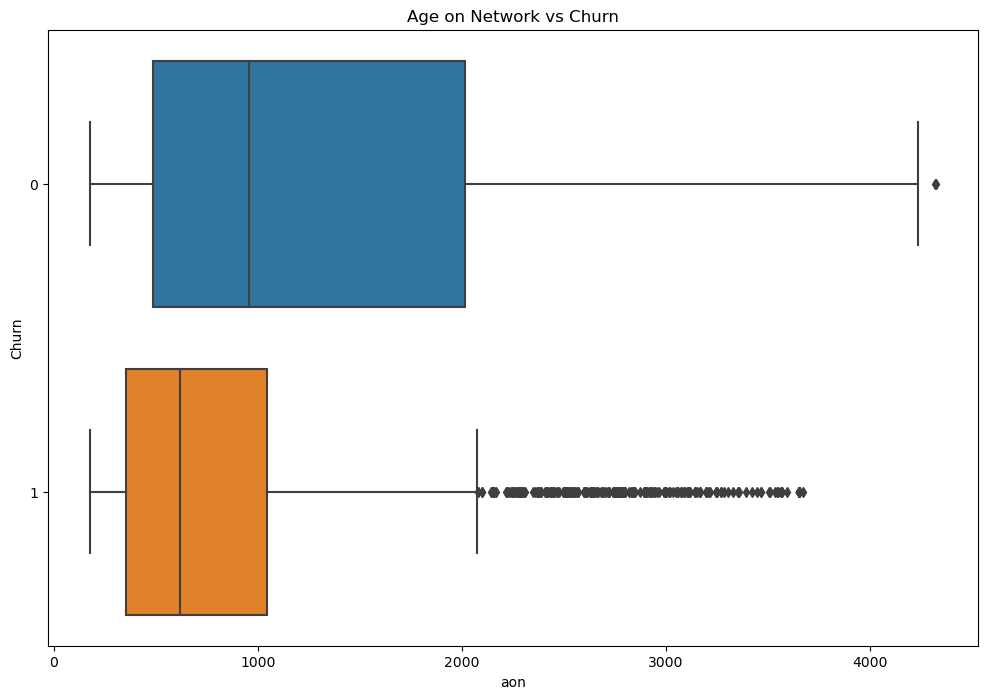

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(x='aon', y='Churn', data=data)
plt.title('Age on Network vs Churn')
plt.show()

    The customers with lesser 'aon' are more likely to churn

##### Churn rate on the basis whether the customer decreased her/his MOU in action month

In [56]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['Churn'] = data['Churn'].astype('int64')

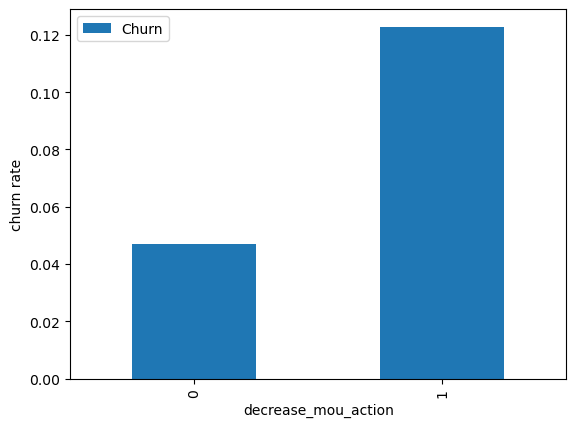

In [57]:
data.pivot_table(values='Churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

    churn rate is more for the customers, whose mou decreased in the action phase than the good phase. 

##### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

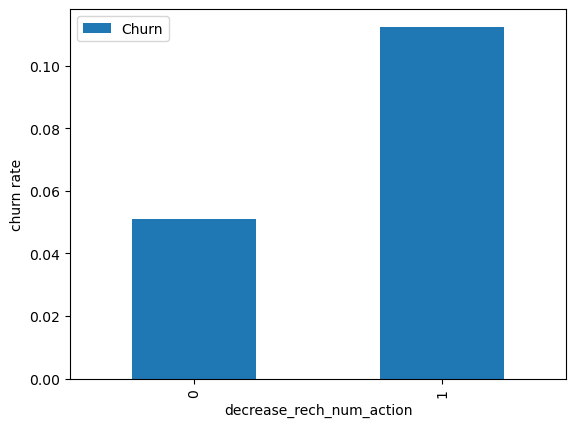

In [58]:
data.pivot_table(values='Churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

    Churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

##### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

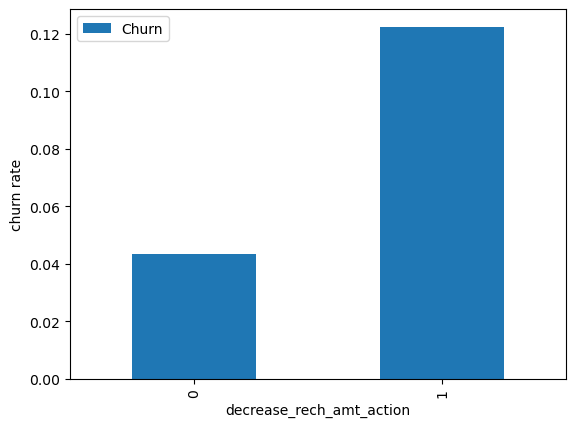

In [59]:
data.pivot_table(values='Churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

    The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

##### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

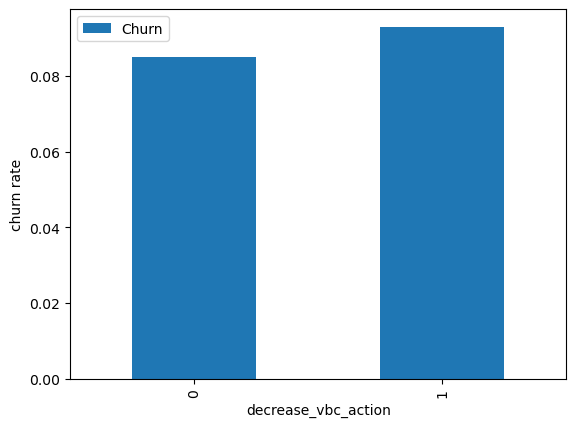

In [60]:
data.pivot_table(values='Churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

    The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

##### Analysis of the average revenue per customer (churn and not churn) in the action phase

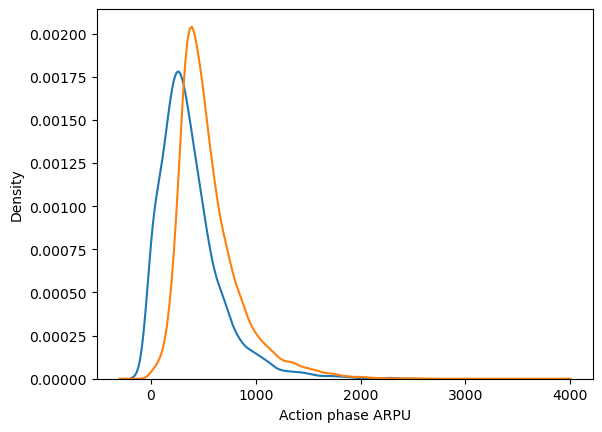

In [61]:
# Creating churn dataframe
data_churn = data[data['Churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['Churn'] == 0]
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')
plt.show()

    - ARPU for the churned customers is mostly densed on the 0 to 900. 
      The higher ARPU customers are less likely to be churned.

    - ARPU for the not churned customers is mostly densed on the 0 to 1000. 

##### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

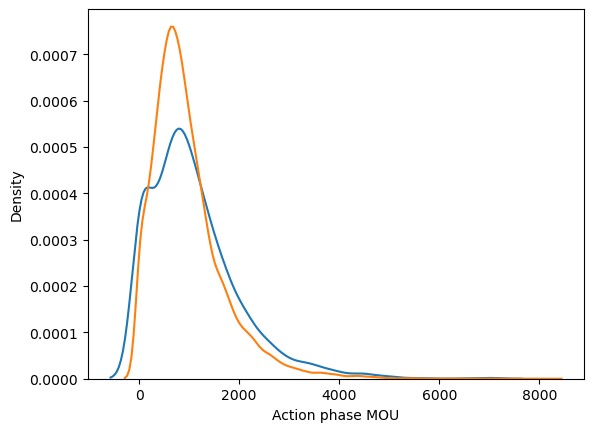

In [62]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')
plt.show()

    MOU of the churn customers is mostly populated on the 0 to 2500 range.
    Higher the MOU, lesser the churn probability.

#### Bivariate analysis

##### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

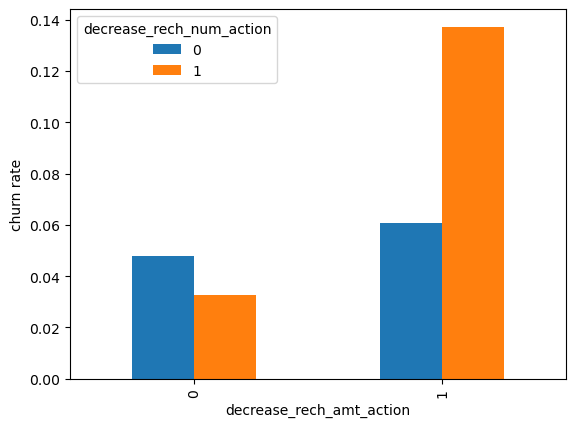

In [63]:
data.pivot_table(values='Churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

    Churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

##### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

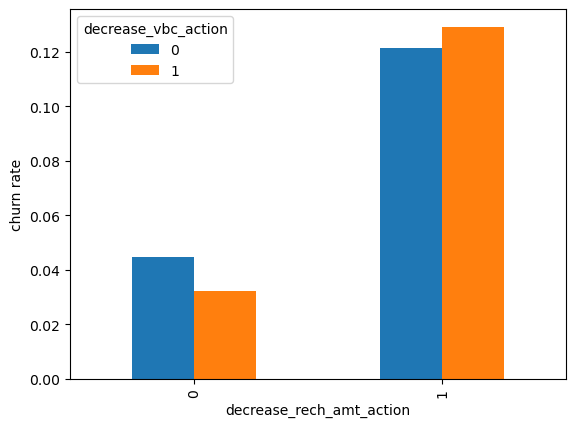

In [64]:
data.pivot_table(values='Churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

    Churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

#### Dropping few derived columns, which are not required in further analysis

In [65]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action',
                  'diff_rech_num','avg_rech_amt_action',
                  'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc'], axis=1)

In [66]:
data['Churn'] = data['Churn'].astype('category')

### Data Preparation
    Deriving variables again to measure the change in usage

In [67]:
# Usage 
data['delta_vol_2g'] = data['vol_2g_mb_8'] - data['vol_2g_mb_6'].add(data['vol_2g_mb_7']).div(2)
data['delta_vol_3g'] = data['vol_3g_mb_8'] - data['vol_3g_mb_6'].add(data['vol_3g_mb_7']).div(2)
data['delta_total_og_mou'] = data['total_og_mou_8'] - data['total_og_mou_6'].add(data['total_og_mou_7']).div(2)
data['delta_total_ic_mou'] = data['total_ic_mou_8'] - data['total_ic_mou_6'].add(data['total_ic_mou_7']).div(2)
data['delta_vbc_3g'] = data['vbc_3g_8'] - data['vbc_3g_6'].add(data['vbc_3g_7']).div(2)

# Revenue 
data['delta_arpu'] = data['arpu_8'] - data['arpu_6'].add(data['arpu_7']).div(2)
data['delta_total_rech_amt'] = data['total_rech_amt_8'] - data['total_rech_amt_6'].add(data['total_rech_amt_7']).div(2)

In [68]:
# Removing variables used for derivation : 
data.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

In [69]:
categorical = data.dtypes == 'category'
categorical_vars = data.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'Churn'} #independent categorical variables
ind_categorical_vars

{'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

In [70]:
# Finding & Grouping categories with less than 1% contribution in each column into "Others"
# Using the Tabulate library for displaying the outputs in form of psql
# Doing this to decrease the unneccesary columns that are significant enough to be kept during analysis
# But not having much contrribution to the column as a whole
for col in ind_categorical_vars : 
    category_counts = 100*data[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <= 1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    data[col].replace(low_count_categories,'Others',inplace=True)


 +----+----------------+
|    |   monthly_3g_7 |
|----+----------------|
|  0 |     88.0741    |
|  1 |      8.17845   |
|  2 |      2.6936    |
|  3 |      0.649832  |
|  4 |      0.198653  |
|  5 |      0.104377  |
|  6 |      0.0606061 |
|  7 |      0.013468  |
|  8 |      0.013468  |
|  9 |      0.010101  |
| 11 |      0.003367  |
| 10 |      0         |
| 12 |      0         |
| 14 |      0         |
| 16 |      0         |
+----+----------------+ 

Replaced [3, 4, 5, 6, 7, 8, 9, 11, 10, 12, 14, 16] in monthly_3g_7 with category : Others

 +----+---------------+
|    |   sachet_2g_6 |
|----+---------------|
|  0 |    82.5522    |
|  1 |     7.83502   |
|  2 |     3.3771    |
|  3 |     2.0202    |
|  4 |     1.34007   |
|  5 |     0.707071  |
|  6 |     0.515152  |
|  7 |     0.356902  |
|  8 |     0.289562  |
|  9 |     0.242424  |
| 10 |     0.171717  |
| 12 |     0.148148  |
| 11 |     0.10101   |
| 13 |     0.0572391 |
| 14 |     0.0505051 |
| 15 |     0.043771  |
| 17 |     

### Creating Dummy Variables

In [71]:
dummy_vars = pd.get_dummies(data[ind_categorical_vars], drop_first=False, prefix=ind_categorical_vars, prefix_sep='_')
dummy_vars.head()

,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_Others,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_Others,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_Others,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_Others,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_Others,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_Others,monthly_2g_8_0,monthly_2g_8_1,monthly_2g_8_Others,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_Others,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_Others,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_Others,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_Others,monthly_2g_6_0,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_Others
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7001524846,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
7002191713,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
7000875565,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7000187447,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [72]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

['monthly_3g_7_Others',
 'sachet_2g_6_Others',
 'monthly_3g_6_Others',
 'monthly_3g_8_Others',
 'monthly_2g_7_Others',
 'sachet_3g_8_Others',
 'monthly_2g_8_Others',
 'sachet_2g_7_Others',
 'sachet_3g_7_Others',
 'sachet_2g_8_Others',
 'sachet_3g_6_Others',
 'monthly_2g_6_Others']

In [73]:
# concatenating dummy variables with original 'data'
data.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
data = pd.concat([data, dummy_vars], axis=1)
data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,Average_rech_amt_6n7,Churn,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_7_2,sachet_3g_8_0,sachet_3g_8_1,monthly_2g_8_0,monthly_2g_8_1,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,monthly_2g_6_0,monthly_2g_6_1,monthly_2g_6_2
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,802,1185.0,1,1,0,0,0,0,0.00,0.000,-198.225,-163.510,38.680,1961.9650,2453.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,315,519.0,0,1,1,1,1,0,-177.97,-363.535,-298.450,-49.635,-495.375,-298.1100,-399.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,6

In [74]:
dummy_cols = dummy_vars.columns.to_list()
data[dummy_cols] = data[dummy_cols].astype('int64')

In [75]:
data.shape

(29700, 147)

### Train-Test Split

In [76]:
y = data.pop('Churn') # Predicted / Target Variable
X = data # Predictor variables

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [78]:
y.value_counts(normalize=True).to_frame()

,Churn
0,0.913973
1,0.086027


In [79]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

    As already noticed there is a huge imbalance between the classes.
    using SMOTE for the same

#### Using SMOTE

In [80]:
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,Average_rech_amt_6n7,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_7_2,sachet_3g_8_0,sachet_3g_8_1,monthly_2g_8_0,monthly_2g_8_1,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,monthly_2g_6_0,monthly_2g_6_1,monthly_2g_6_2
0,206.04,895.33,1191.49,71.21,482.14,300.78,0.00,0.0,0.0,7.73,0.0,0.0,0.93,13.28,9.61,5.43,18.86,9.23,0.00,0.00,0.00,22.93,18.26,4.51,6.36,32.14,18.84,197.38,882.04,1181.88,40.31,278.54,218.46,0.0,0.91,1.64,237.69,1161.51,1401.99,0.0,0.0,0.0,26.46,196.09,85.94,0.00,0.0,0.0,53.53,322.91,202.98,0.00,45.23,15.96,1.41,0.00,0.00,54.94,368.14,218.94,17.48,144.48,48.68,35.23,45.96,33.46,0.0,14.88,25.53,52.71,205.33,107.68,0.00,0.0,0.00,0.00,0.13,0.00,0.00,0.00,0.00,13,46,39,30,44,44,30,44,30,567,703.5,0,0,0,0,0,-64.055,0.00,676.645,-14.005,0.000,176.8240,194.5,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1,325.14,731.34,839.79,17.13,44.61,88.28,1.79,0.0,0.0,19.06,0.0,0.0,2.65,2.70,13.14,3.59,13.28,18.78,0.00,0.00,0.00,0.00,0.00,0.00,6.24,15.98,31.93,303.68,728.64,826.64,13.28,31.33,69.49,0.0,0.00,0.00,316.96,759.98,896.14,0.0,0.0,0.0,0.00,0.63,0.00,0.00,0.0,0.0,0.00,6.68,35.63,12.93,11.81,18.46,0.00,0.25,0.00,12.93,18.74,54.09,2.13,4.51,0.00,5.44,17.04,6.84,0.0,0.00,0.00,7.58,21.56,6.84,0.00,0.0,0.25,0.00,0.00,17.46,0.00,2.25,2.63,5,9,9,110,130,130,0,130,130,547,400.5,0,0,0,0,0,0.000,0.00,378.180,49.755,0.000,247.3370,335.5,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,442.41,185.64,148.43,203.69,73.51,128.19,0.00,0.0,0.0,0.00,0.0,0.0,78.09,93.14,29.89,92.59,27.88,101.96,56.66,7.84,13.63,0.00,0.00,0.00,227.36,128.88,145.49,364.31,92.49,118.53,16.33,33.51,12.59,38.1,0.00,0.00,418.74,126.01,131.13,0.0,0.0,0.0,0.00,4.26,0.00,0.00,0.0,0.0,105.86,83.04,14.99,408.09,97.68,122.43,3.56,0.25,0.00,517.53,180.98,137.43,32.39,37.11,89.18,124.33,27.94,22.98,10.5,0.00,0.00,167.23,65.06,112.16,0.19,0.0,0.00,11.83,14.65,0.46,0.86,0.11,2.44,7,5,11,269,252,252,250,252,0,1265,753.0,1,0,1,1,0,-26.675,-522.25,

#### Standardizing Columns


In [81]:
# columns with numerical data
condition1 = data.dtypes == 'int'
condition2 = data.dtypes == 'float'
numerical_vars = data.columns[condition1 | condition2].to_list()

In [82]:
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [83]:
round(X_train_resampled.describe(),2)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,Average_rech_amt_6n7,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_7_2,sachet_3g_8_0,sachet_3g_8_1,monthly_2g_8_0,monthly_2g_8_1,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,monthly_2g_6_0,monthly_2g_6_1,monthly_2g_6_2
count,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.00,38024.0,38024.00,38024.00
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,12.79,11.38,7.63,15

### Modelling

#### Model 1 Logistic Regression Without PCA

In [84]:
baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [85]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

    Defining a function to calculate and show the accuracy,senstivity,specificity,precision and f1-score of the model

In [86]:
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity:', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity: ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision:', precision)
    print('F1-score:', round(2*precision*sensitivity/(precision + sensitivity),3))

    Selecting cut-off at 0.5 (arbitraty point)

In [87]:
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [88]:
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15803  3209]
 [  294  1484]]

Confusion Matrix for test: 
 [[6554 1579]
 [ 374  403]]


In [89]:
print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.832
Sensitivity: 0.835
Specificity:  0.831
Precision: 0.316
F1-score: 0.458


Test Performance : 

Accuracy : 0.781
Sensitivity: 0.519
Specificity:  0.806
Precision: 0.203
F1-score: 0.292


    Finding optimal cutt-off point

In [90]:
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7002356152,1,1,0,0,0,0,0,0,0,0
7000184645,1,1,1,0,0,0,0,0,0,0
7000775819,1,1,1,0,0,0,0,0,0,0
7000375791,1,1,0,0,0,0,0,0,0,0
7001141876,1,1,1,0,0,0,0,0,0,0


    sensitivity, specificity, accuracy for each threshold

In [91]:
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.086
0.1,0.971,0.333,0.388
0.2,0.949,0.511,0.548
0.3,0.915,0.642,0.665
0.4,0.872,0.751,0.761
0.5,0.835,0.831,0.832
0.6,0.773,0.881,0.872
0.7,0.670,0.922,0.901
0.8,0.457,0.957,0.914
0.9,0.219,0.982,0.917


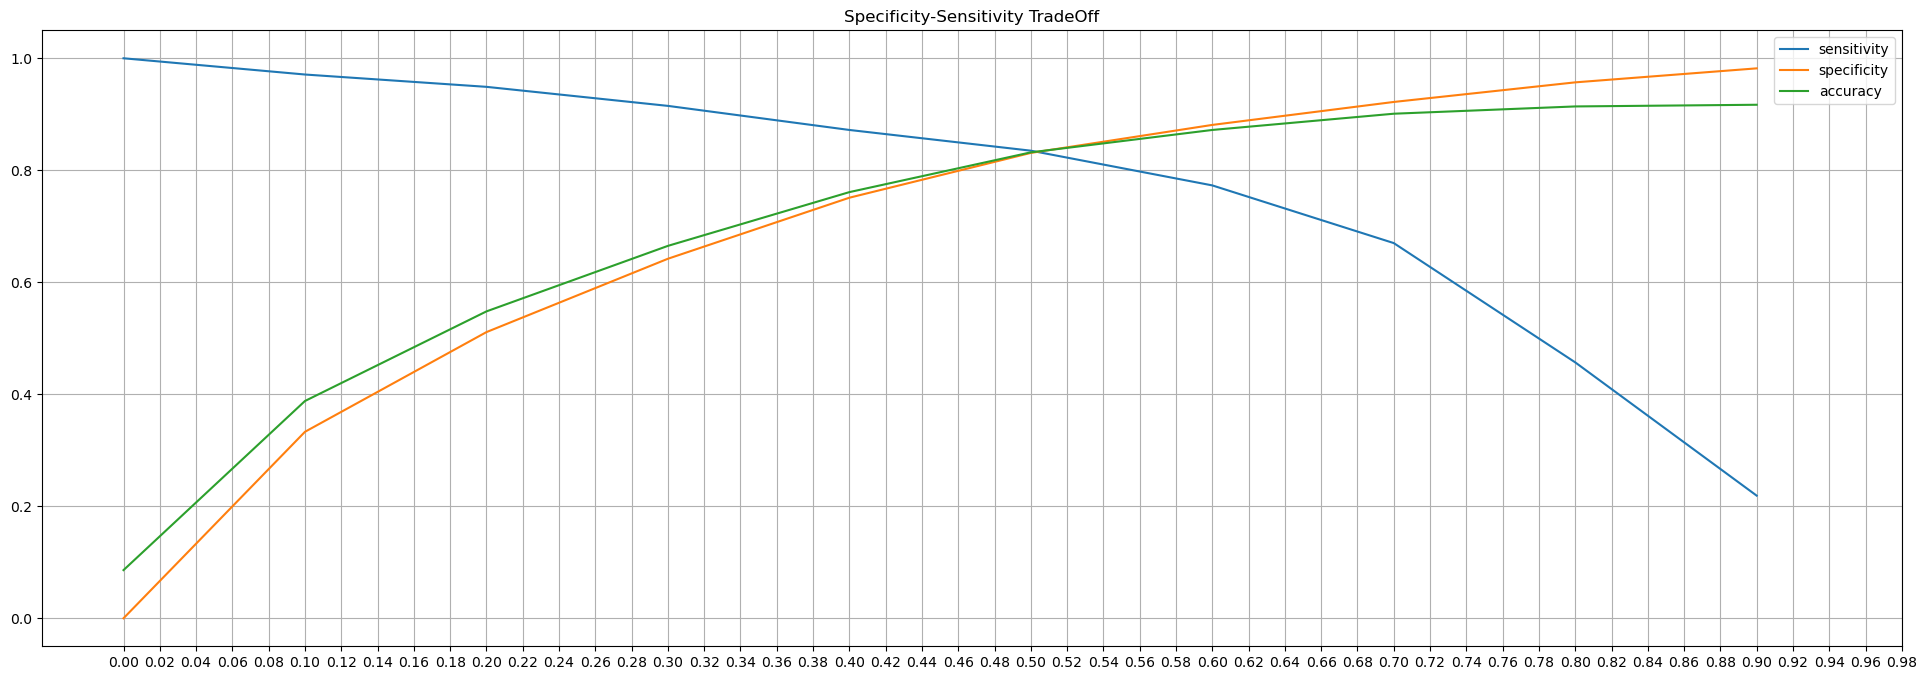

In [92]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff')
plt.show()

    Plot suggesting an optimal cut-off at 0.51

In [93]:
optimum_cutoff = 0.51
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15903  3109]
 [  303  1475]]

Confusion Matrix for test: 
 [[6871 1262]
 [ 454  323]]


In [94]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.836
Sensitivity: 0.83
Specificity:  0.836
Precision: 0.322
F1-score: 0.464


Test Performance : 

Accuracy : 0.807
Sensitivity: 0.416
Specificity:  0.845
Precision: 0.204
F1-score: 0.274


In [95]:
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(estimator=lr, n_features_to_select=15)
results = rfe.fit(X_train,y_train)

# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)


# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['monthly_3g_8_1',
 'monthly_3g_7_0',
 'sachet_2g_7_0',
 'total_rech_num_8',
 'monthly_2g_6_0',
 'sachet_3g_7_0',
 'total_rech_num_6',
 'monthly_2g_8_0',
 'sachet_3g_8_0',
 'sachet_2g_8_0',
 'monthly_2g_8_1',
 'std_og_t2f_mou_8',
 'monthly_3g_6_0',
 'monthly_3g_8_0',
 'loc_og_t2f_mou_6']

In [96]:
logr = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38024
Model:                            GLM   Df Residuals:                    38008
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18820.
Date:                Tue, 06 Feb 2024   Deviance:                       37641.
Time:                        07:19:01   Pearson chi2:                 1.10e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3272
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.5720      0.137     11.437      0.000       1.303       1.841
monthly_3g_8_1      -3.4391      0.174    -19.711      0.000      -3.781      -3.097
monthly_3g_7_0      -0.4934      0.059     -8.297      0.000      -0.610      -0.377
sachet_2g_7_0       -0.1934      0.037     -5.161      0.000      -0.267      -0.120
total_rech_num_8    -0.1943      0.003    -69.646      0.000      -0.200      -0.189
monthly_2g_6_0      -0.0453      0.050     -0.898      0.369      -0.144       0.053
sachet_3g_7_0       -0.4005      0.059     -6.846      0.000      -0.515      -0.286
total_rech_num_6     0.0768      0.002     39.164      0.000       0.073       0.081
monthly_2g_8_0      -0.6275      0.106     -5.917      0.000      -0.835      -0.420
sachet_3g_8_0        0.4289      0.070      6.142      0.000       0.292       0.566
sachet_2g_8_0       -0.1992      0.038     -5.267      0.000      -0.273      -0.125
monthly_2g_8_1      -5.0618      0.231    -21.900      0.000      -5.515      -4.609
std_og_t2f_mou_8    -0.4487      0.036    -12.461      0.000      -0.519      -0.378
monthly_3g_6_0      -0.4083      0.055     -7.374      0.000      -0.517      -0.300
monthly_3g_8_0       0.8079      0.082      9.889      0.000       0.648       0.968
loc_og_t2f_mou_6    -0.5425      0.023    -23.462      0.000      -0.588      -0.497
====================================================================================
"""

    Defining a function to calculate the VIF and P value together for the selected features

In [97]:
def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train_resampled, logr_fit, rfe_selected_columns)

,VIF,P-value
Features,,
monthly_2g_8_0,37.29,0.000
monthly_3g_8_0,33.22,0.000
sachet_3g_8_0,24.99,0.000
sachet_3g_7_0,17.60,0.000
monthly_3g_7_0,16.19,0.000
monthly_3g_6_0,13.61,0.000
monthly_2g_6_0,12.04,0.369
sachet_2g_8_0,7.25,0.000
sachet_2g_7_0,6.92,0.000


    Eliminating monthly_2g_8_0 , has very high VIF

In [98]:
selected_columns = rfe_selected_columns
selected_columns.remove('monthly_2g_8_0')
selected_columns

['monthly_3g_8_1',
 'monthly_3g_7_0',
 'sachet_2g_7_0',
 'total_rech_num_8',
 'monthly_2g_6_0',
 'sachet_3g_7_0',
 'total_rech_num_6',
 'sachet_3g_8_0',
 'sachet_2g_8_0',
 'monthly_2g_8_1',
 'std_og_t2f_mou_8',
 'monthly_3g_6_0',
 'monthly_3g_8_0',
 'loc_og_t2f_mou_6']

In [99]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38024
Model:                            GLM   Df Residuals:                    38009
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18838.
Date:                Tue, 06 Feb 2024   Deviance:                       37677.
Time:                        07:19:01   Pearson chi2:                 1.06e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3266
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0299      0.102     10.134      0.000       0.831       1.229
monthly_3g_8_1      -3.4450      0.174    -19.750      0.000      -3.787      -3.103
monthly_3g_7_0      -0.4978      0.059     -8.376      0.000      -0.614      -0.381
sachet_2g_7_0       -0.2051      0.037     -5.483      0.000      -0.278      -0.132
total_rech_num_8    -0.1931      0.003    -69.600      0.000      -0.199      -0.188
monthly_2g_6_0      -0.1098      0.049     -2.222      0.026      -0.207      -0.013
sachet_3g_7_0       -0.3984      0.058     -6.815      0.000      -0.513      -0.284
total_rech_num_6     0.0762      0.002     38.997      0.000       0.072       0.080
sachet_3g_8_0        0.4138      0.070      5.939      0.000       0.277       0.550
sachet_2g_8_0       -0.1928      0.038     -5.103      0.000      -0.267      -0.119
monthly_2g_8_1      -4.4808      0.209    -21.428      0.000      -4.891      -4.071
std_og_t2f_mou_8    -0.4503      0.036    -12.489      0.000      -0.521      -0.380
monthly_3g_6_0      -0.4137      0.055     -7.470      0.000      -0.522      -0.305
monthly_3g_8_0       0.8179      0.082     10.017      0.000       0.658       0.978
loc_og_t2f_mou_6    -0.5437      0.023    -23.498      0.000      -0.589      -0.498
====================================================================================
"""

In [100]:
vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
monthly_3g_8_0,28.32,0.0000
sachet_3g_8_0,22.90,0.0000
sachet_3g_7_0,17.38,0.0000
monthly_3g_7_0,16.19,0.0000
monthly_3g_6_0,13.58,0.0000
monthly_2g_6_0,10.27,0.0263
sachet_2g_8_0,7.21,0.0000
sachet_2g_7_0,6.88,0.0000
total_rech_num_6,3.35,0.0000


    Eliminating sachet_3g_8_0 , has very high VIF

In [101]:
selected_columns = rfe_selected_columns
selected_columns.remove('sachet_3g_8_0')
selected_columns

['monthly_3g_8_1',
 'monthly_3g_7_0',
 'sachet_2g_7_0',
 'total_rech_num_8',
 'monthly_2g_6_0',
 'sachet_3g_7_0',
 'total_rech_num_6',
 'sachet_2g_8_0',
 'monthly_2g_8_1',
 'std_og_t2f_mou_8',
 'monthly_3g_6_0',
 'monthly_3g_8_0',
 'loc_og_t2f_mou_6']

In [102]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38024
Model:                            GLM   Df Residuals:                    38010
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18856.
Date:                Tue, 06 Feb 2024   Deviance:                       37713.
Time:                        07:19:02   Pearson chi2:                 1.08e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3260
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2665      0.093     13.566      0.000       1.084       1.449
monthly_3g_8_1      -3.4440      0.174    -19.759      0.000      -3.786      -3.102
monthly_3g_7_0      -0.4756      0.059     -8.050      0.000      -0.591      -0.360
sachet_2g_7_0       -0.2033      0.037     -5.447      0.000      -0.276      -0.130
total_rech_num_8    -0.1940      0.003    -69.979      0.000      -0.199      -0.189
monthly_2g_6_0      -0.1101      0.049     -2.232      0.026      -0.207      -0.013
sachet_3g_7_0       -0.2692      0.054     -5.016      0.000      -0.374      -0.164
total_rech_num_6     0.0762      0.002     39.003      0.000       0.072       0.080
sachet_2g_8_0       -0.1512      0.037     -4.081      0.000      -0.224      -0.079
monthly_2g_8_1      -4.4705      0.209    -21.383      0.000      -4.880      -4.061
std_og_t2f_mou_8    -0.4518      0.036    -12.486      0.000      -0.523      -0.381
monthly_3g_6_0      -0.4122      0.055     -7.457      0.000      -0.521      -0.304
monthly_3g_8_0       0.8041      0.081      9.885      0.000       0.645       0.964
loc_og_t2f_mou_6    -0.5448      0.023    -23.535      0.000      -0.590      -0.499
====================================================================================
"""

In [103]:
vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
monthly_3g_8_0,26.39,0.0000
monthly_3g_7_0,16.17,0.0000
sachet_3g_7_0,13.88,0.0000
monthly_3g_6_0,13.58,0.0000
monthly_2g_6_0,10.03,0.0256
sachet_2g_7_0,6.88,0.0000
sachet_2g_8_0,6.65,0.0000
total_rech_num_6,3.35,0.0000
total_rech_num_8,2.27,0.0000


    Eliminating monthly_3g_8_0 , has very high VIF

In [104]:
selected_columns = rfe_selected_columns
selected_columns.remove('monthly_3g_8_0')
selected_columns

['monthly_3g_8_1',
 'monthly_3g_7_0',
 'sachet_2g_7_0',
 'total_rech_num_8',
 'monthly_2g_6_0',
 'sachet_3g_7_0',
 'total_rech_num_6',
 'sachet_2g_8_0',
 'monthly_2g_8_1',
 'std_og_t2f_mou_8',
 'monthly_3g_6_0',
 'loc_og_t2f_mou_6']

In [105]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38024
Model:                            GLM   Df Residuals:                    38011
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18906.
Date:                Tue, 06 Feb 2024   Deviance:                       37812.
Time:                        07:19:02   Pearson chi2:                 1.15e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3242
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7456      0.080     21.878      0.000       1.589       1.902
monthly_3g_8_1      -3.9829      0.165    -24.072      0.000      -4.307      -3.659
monthly_3g_7_0      -0.2687      0.054     -5.002      0.000      -0.374      -0.163
sachet_2g_7_0       -0.1983      0.037     -5.322      0.000      -0.271      -0.125
total_rech_num_8    -0.1962      0.003    -70.705      0.000      -0.202      -0.191
monthly_2g_6_0      -0.1094      0.049     -2.235      0.025      -0.205      -0.013
sachet_3g_7_0       -0.2768      0.053     -5.191      0.000      -0.381      -0.172
total_rech_num_6     0.0770      0.002     39.359      0.000       0.073       0.081
sachet_2g_8_0       -0.1668      0.037     -4.513      0.000      -0.239      -0.094
monthly_2g_8_1      -4.4153      0.209    -21.144      0.000      -4.825      -4.006
std_og_t2f_mou_8    -0.4514      0.036    -12.461      0.000      -0.522      -0.380
monthly_3g_6_0      -0.2733      0.052     -5.249      0.000      -0.375      -0.171
loc_og_t2f_mou_6    -0.5466      0.023    -23.663      0.000      -0.592      -0.501
====================================================================================
"""

In [106]:
vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
monthly_3g_7_0,13.77,0.0000
sachet_3g_7_0,13.03,0.0000
monthly_3g_6_0,12.43,0.0000
monthly_2g_6_0,8.92,0.0254
sachet_2g_7_0,6.85,0.0000
sachet_2g_8_0,6.54,0.0000
total_rech_num_6,3.31,0.0000
total_rech_num_8,2.27,0.0000
monthly_2g_8_1,1.18,0.0000


    Eliminating monthly_3g_7_0 , has very high VIF value

In [108]:
selected_columns = rfe_selected_columns
selected_columns.remove('monthly_3g_7_0')
selected_columns

['monthly_3g_8_1',
 'sachet_2g_7_0',
 'total_rech_num_8',
 'monthly_2g_6_0',
 'sachet_3g_7_0',
 'total_rech_num_6',
 'sachet_2g_8_0',
 'monthly_2g_8_1',
 'std_og_t2f_mou_8',
 'monthly_3g_6_0',
 'loc_og_t2f_mou_6']

In [109]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38024
Model:                            GLM   Df Residuals:                    38012
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18919.
Date:                Tue, 06 Feb 2024   Deviance:                       37838.
Time:                        07:19:49   Pearson chi2:                 1.09e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3238
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.6716      0.078     21.355      0.000       1.518       1.825
monthly_3g_8_1      -3.8965      0.164    -23.708      0.000      -4.219      -3.574
sachet_2g_7_0       -0.1986      0.037     -5.332      0.000      -0.272      -0.126
total_rech_num_8    -0.1956      0.003    -70.677      0.000      -0.201      -0.190
monthly_2g_6_0      -0.1173      0.049     -2.396      0.017      -0.213      -0.021
sachet_3g_7_0       -0.3005      0.053     -5.664      0.000      -0.404      -0.197
total_rech_num_6     0.0759      0.002     39.170      0.000       0.072       0.080
sachet_2g_8_0       -0.1653      0.037     -4.475      0.000      -0.238      -0.093
monthly_2g_8_1      -4.4252      0.209    -21.186      0.000      -4.835      -4.016
std_og_t2f_mou_8    -0.4483      0.036    -12.431      0.000      -0.519      -0.378
monthly_3g_6_0      -0.4204      0.043     -9.695      0.000      -0.505      -0.335
loc_og_t2f_mou_6    -0.5491      0.023    -23.756      0.000      -0.594      -0.504
====================================================================================
"""

In [110]:
vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
sachet_3g_7_0,12.54,0.0000
monthly_2g_6_0,8.68,0.0166
monthly_3g_6_0,7.91,0.0000
sachet_2g_7_0,6.85,0.0000
sachet_2g_8_0,6.52,0.0000
total_rech_num_6,3.26,0.0000
total_rech_num_8,2.26,0.0000
monthly_2g_8_1,1.17,0.0000
monthly_3g_8_1,1.11,0.0000


    Eliminating sachet_3g_7_0 , has very high VIF value

In [111]:
selected_columns = rfe_selected_columns
selected_columns.remove('sachet_3g_7_0')
selected_columns

['monthly_3g_8_1',
 'sachet_2g_7_0',
 'total_rech_num_8',
 'monthly_2g_6_0',
 'total_rech_num_6',
 'sachet_2g_8_0',
 'monthly_2g_8_1',
 'std_og_t2f_mou_8',
 'monthly_3g_6_0',
 'loc_og_t2f_mou_6']

In [112]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38024
Model:                            GLM   Df Residuals:                    38013
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18935.
Date:                Tue, 06 Feb 2024   Deviance:                       37870.
Time:                        07:20:03   Pearson chi2:                 1.10e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3232
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4828      0.070     21.061      0.000       1.345       1.621
monthly_3g_8_1      -3.8982      0.164    -23.706      0.000      -4.221      -3.576
sachet_2g_7_0       -0.2535      0.036     -7.038      0.000      -0.324      -0.183
total_rech_num_8    -0.1954      0.003    -70.657      0.000      -0.201      -0.190
monthly_2g_6_0      -0.1303      0.049     -2.666      0.008      -0.226      -0.035
total_rech_num_6     0.0758      0.002     39.160      0.000       0.072       0.080
sachet_2g_8_0       -0.1740      0.037     -4.718      0.000      -0.246      -0.102
monthly_2g_8_1      -4.4332      0.209    -21.223      0.000      -4.843      -4.024
std_og_t2f_mou_8    -0.4457      0.036    -12.366      0.000      -0.516      -0.375
monthly_3g_6_0      -0.4510      0.043    -10.486      0.000      -0.535      -0.367
loc_og_t2f_mou_6    -0.5478      0.023    -23.716      0.000      -0.593      -0.503
====================================================================================
"""

In [113]:
vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
monthly_2g_6_0,7.64,0.0077
monthly_3g_6_0,6.91,0.0000
sachet_2g_8_0,6.35,0.0000
sachet_2g_7_0,5.99,0.0000
total_rech_num_6,3.24,0.0000
total_rech_num_8,2.26,0.0000
monthly_2g_8_1,1.15,0.0000
monthly_3g_8_1,1.10,0.0000
loc_og_t2f_mou_6,1.03,0.0000


    Feature Selection looks good now

#### Final Logistic Regression Model with RFE and Manual Elimination¶

In [114]:
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38024
Model:                            GLM   Df Residuals:                    38013
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18935.
Date:                Tue, 06 Feb 2024   Deviance:                       37870.
Time:                        07:20:21   Pearson chi2:                 1.10e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3232
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4828      0.070     21.061      0.000       1.345       1.621
monthly_3g_8_1      -3.8982      0.164    -23.706      0.000      -4.221      -3.576
sachet_2g_7_0       -0.2535      0.036     -7.038      0.000      -0.324      -0.183
total_rech_num_8    -0.1954      0.003    -70.657      0.000      -0.201      -0.190
monthly_2g_6_0      -0.1303      0.049     -2.666      0.008      -0.226      -0.035
total_rech_num_6     0.0758      0.002     39.160      0.000       0.072       0.080
sachet_2g_8_0       -0.1740      0.037     -4.718      0.000      -0.246      -0.102
monthly_2g_8_1      -4.4332      0.209    -21.223      0.000      -4.843      -4.024
std_og_t2f_mou_8    -0.4457      0.036    -12.366      0.000      -0.516      -0.375
monthly_3g_6_0      -0.4510      0.043    -10.486      0.000      -0.535      -0.367
loc_og_t2f_mou_6    -0.5478      0.023    -23.716      0.000      -0.593      -0.503
====================================================================================
"""

In [115]:
selected_columns

['monthly_3g_8_1',
 'sachet_2g_7_0',
 'total_rech_num_8',
 'monthly_2g_6_0',
 'total_rech_num_6',
 'sachet_2g_8_0',
 'monthly_2g_8_1',
 'std_og_t2f_mou_8',
 'monthly_3g_6_0',
 'loc_og_t2f_mou_6']

In [116]:
# Prediction 
y_train_pred_lr = logr2_fit.predict(sm.add_constant(X_train_resampled[selected_columns]))
y_train_pred_lr.head()

0    0.003120
1    0.335997
2    0.001604
3    0.325601
4    0.638082
dtype: float64

In [117]:
y_test_pred_lr = logr2_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

mobile_number
7001198003    0.013422
7000246771    0.267387
7001064233    0.034297
7001535250    0.539710
7000828297    0.002050
dtype: float64

#### Performance

#### Finding Optimum Probability Cutoff

In [118]:
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0
4,1,1,1,1,1,1,1,0,0,0


In [119]:
logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  logr_metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
logr_metrics_df.index = thresholds
logr_metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.500
0.1,0.981,0.288,0.635
0.2,0.961,0.367,0.664
0.3,0.922,0.462,0.692
0.4,0.878,0.570,0.724
0.5,0.812,0.696,0.754
0.6,0.702,0.828,0.765
0.7,0.536,0.929,0.732
0.8,0.291,0.977,0.634
0.9,0.098,0.993,0.546


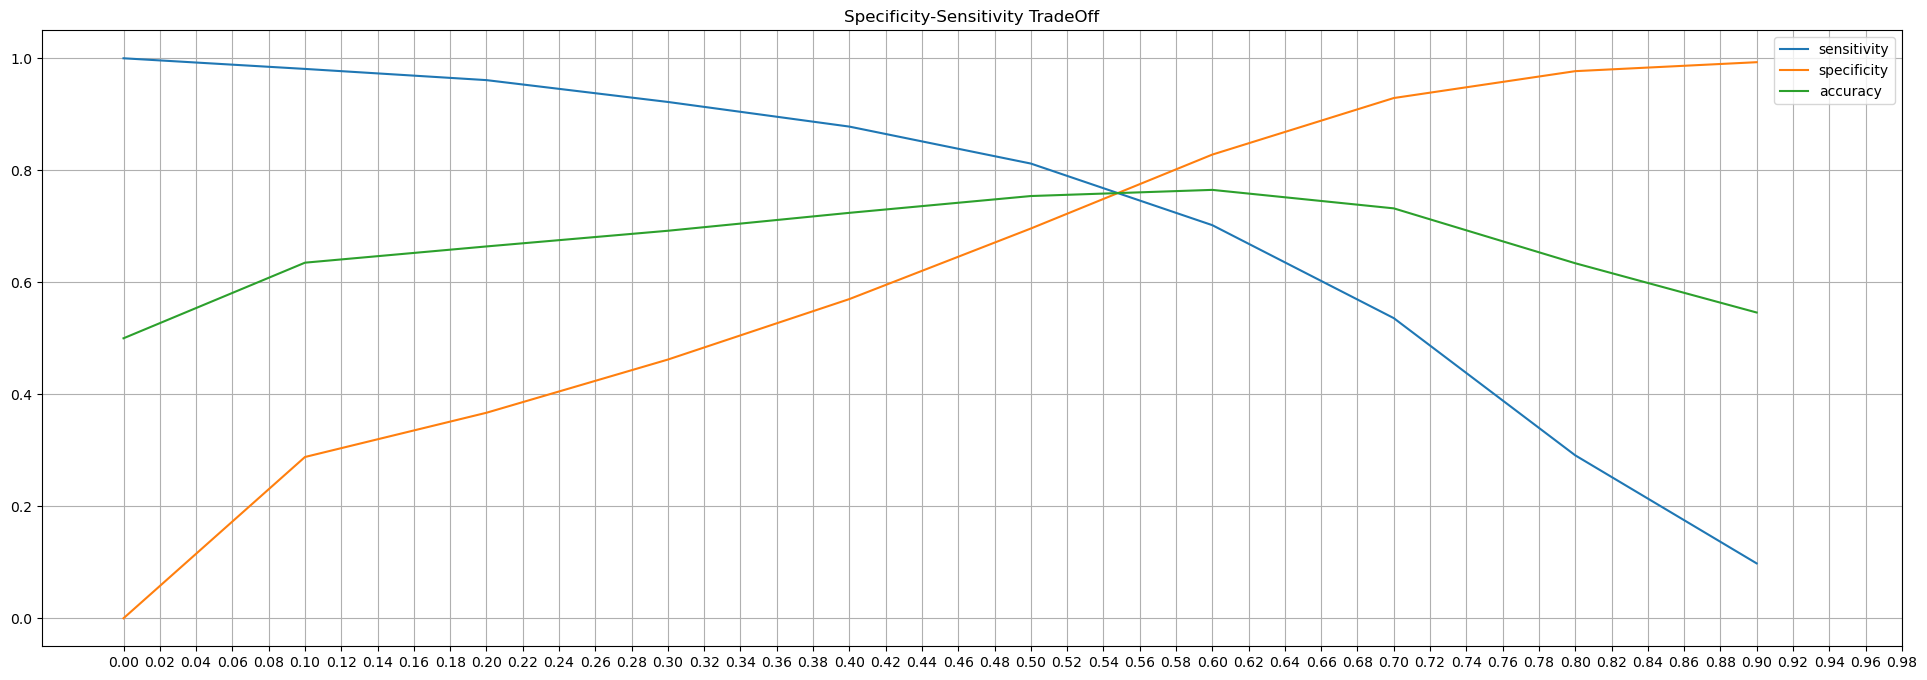

In [120]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

    The optimum probability cutoff for Logistic regression model is 0.55

In [121]:
optimum_cutoff = 0.55
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[14502  4510]
 [ 4506 14506]]

Confusion Matrix for test: 
 [[6248 1885]
 [ 238  539]]


In [122]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.763
Sensitivity: 0.763
Specificity:  0.763
Precision: 0.763
F1-score: 0.763


Test Performance : 

Accuracy : 0.762
Sensitivity: 0.694
Specificity:  0.768
Precision: 0.222
F1-score: 0.336


### MODEL 1 Summary

##### Most important predictors of Churn , in order of importance and their coefficients are as follows:

    monthly_2g_8_1     -4.4332
    monthly_3g_8_1     -3.8982
    const               1.4828
    loc_og_t2f_mou_6   -0.5478
    monthly_3g_6_0     -0.4510
    std_og_t2f_mou_8   -0.4457
    sachet_2g_7_0      -0.2535
    total_rech_num_8   -0.1954
    sachet_2g_8_0      -0.1740
    monthly_2g_6_0     -0.1303
    total_rech_num_6    0.0758
    
##### With the performance being : 

    Train Performance: 

    Accuracy : 0.763
    Sensitivity: 0.763
    Specificity:  0.763
    Precision: 0.763
    F1-score: 0.763


    Test Performance : 

    Accuracy : 0.762
    Sensitivity: 0.694
    Specificity:  0.768
    Precision: 0.222
    F1-score: 0.336
    


### Model 2 : Logistic Regression Model With PCA

In [125]:
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[ 1.56213435e-01,  1.96016907e-01,  1.81151156e-01, ...,
         3.51350134e-05, -3.07580323e-05, -3.92188753e-06],
       [ 5.17798191e-02,  1.00277658e-01,  1.39560178e-01, ...,
         1.51372303e-06, -8.38788255e-08, -6.98632947e-07],
       [-2.87003390e-01, -3.28436863e-01, -2.86446027e-01, ...,
        -4.71104805e-06,  4.33788429e-06,  4.57703406e-07],
       ...,
       [-1.18439967e-06,  1.85011899e-06, -1.95999170e-06, ...,
         2.04264645e-04,  2.01505339e-04, -1.03455873e-04],
       [ 1.58335253e-06, -1.40008278e-06, -1.08627269e-06, ...,
         2.42884976e-04,  2.53806951e-04,  2.32002486e-04],
       [ 3.94403517e-06,  1.05379695e-06, -1.99456692e-06, ...,
        -3.04333329e-04, -3.19706162e-04, -4.66515367e-04]])

In [126]:
pca.explained_variance_ratio_

array([2.47685422e-01, 1.46901717e-01, 1.15262845e-01, 1.00472660e-01,
       9.71108970e-02, 4.84786820e-02, 3.72138508e-02, 2.65036821e-02,
       2.30226935e-02, 1.88350572e-02, 1.56084653e-02, 1.34101139e-02,
       1.18100203e-02, 1.03482898e-02, 9.01340771e-03, 8.45503295e-03,
       8.01422808e-03, 7.75902513e-03, 6.17166969e-03, 5.29723440e-03,
       5.18964871e-03, 3.82984729e-03, 3.47880022e-03, 3.39280143e-03,
       2.87235392e-03, 2.49809169e-03, 2.01008247e-03, 1.91186527e-03,
       1.58821440e-03, 1.47831117e-03, 1.39450943e-03, 1.37823992e-03,
       1.25267970e-03, 1.14303564e-03, 1.06255509e-03, 9.33144669e-04,
       9.03730226e-04, 8.45355756e-04, 7.92714554e-04, 7.18877102e-04,
       6.74779121e-04, 4.71612739e-04, 4.12463345e-04, 2.99668713e-04,
       2.75948129e-04, 2.62248376e-04, 1.99525966e-04, 1.64202749e-04,
       1.54035520e-04, 1.42755922e-04, 1.25104353e-04, 9.63635247e-05,
       8.24238651e-05, 8.11431811e-05, 7.97962234e-05, 5.96008221e-05,
      

#### Scree Plot

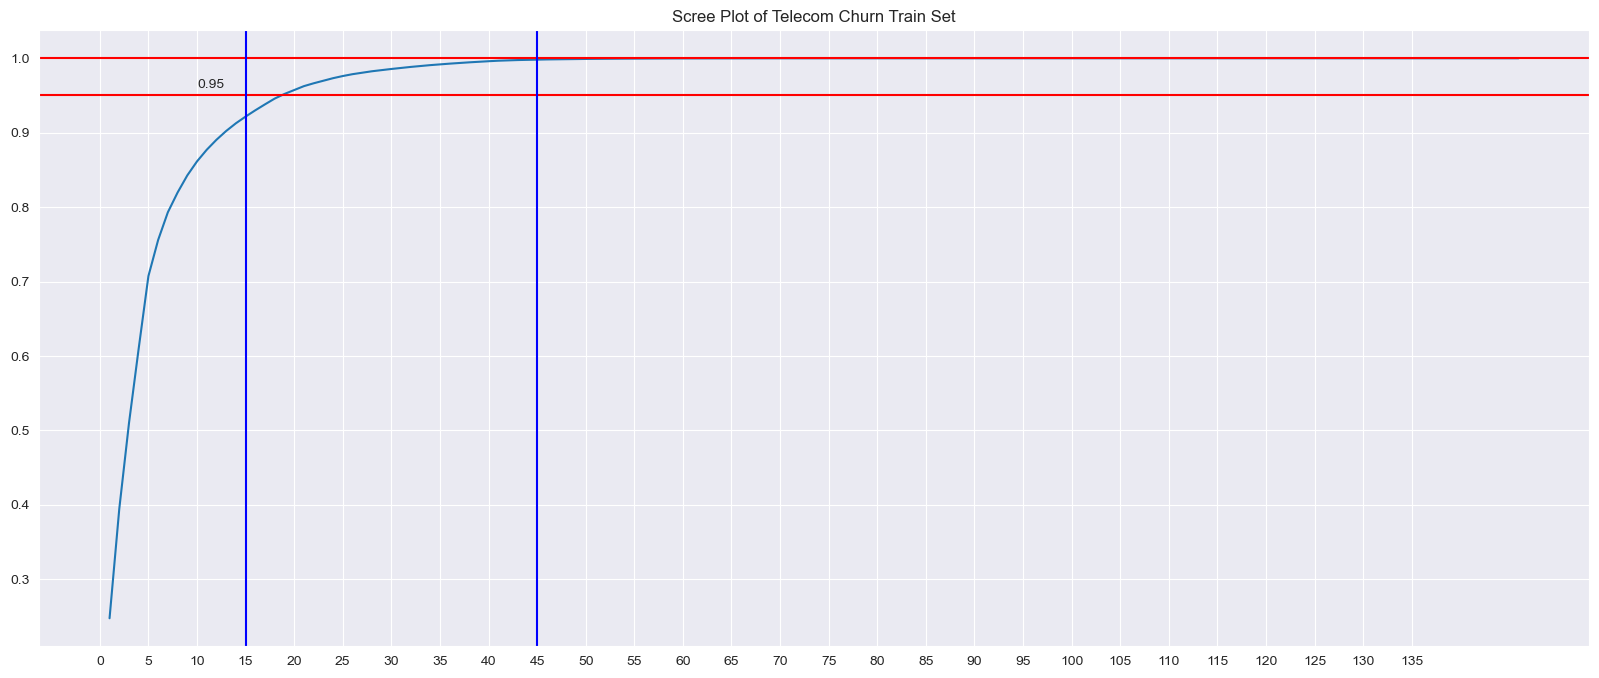

In [127]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(x=np.arange(1,len(var_cum) + 1), y=var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set')
plt.show()

    It is clear that 95% of variance in the train set can be explained by first 18 principal components and 100% of variance is explained by the first 45 principal components.



In [128]:
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7002356152,1613.022382,-102.729939,-886.287007,1331.895193,311.030801,-248.290176,362.010240,625.311887,-36.467024,-491.387869,189.781332,-11.421894,14.601149,80.291845,-103.530661,-279.796105,204.313712,-105.117365,-37.599647,93.288571,154.107943,-45.633842,49.460954,-141.436429,-80.296275,36.992359,48.393473,41.243660,-9.599497,-2.702416,35.772652,78.845111,111.330673,-11.239415,-57.677973,6.159473,3.428111,12.064551,95.017978,-1.088977,-26.297862,12.129117,-3.931930,18.755924,56.949804,0
7000184645,944.948541,-657.392853,-993.898482,1087.130891,159.032217,-57.880560,34.008203,147.150136,-154.671583,-310.045379,-84.155803,-207.620077,64.007137,-58.910711,31.980821,-61.876874,-21.277630,3.579626,-36.109360,46.850702,-47.624889,-43.506265,-5.490882,15.525983,-0.317464,-49.944958,-2.183421,-36.911842,4.030099,5.035273,-28.778717,-16.195110,23.115538,8.336489,-0.376710,51.494692,-2.273659,-4.647555,-4.097325,45.488134,-33.068059,0.443764,17.567878,-7.458368,-0.093062,0
7000775819,-396.631534,-375.024172,-329.167831,-100.259600,-58.254714,-425.923583,213.307053,-376.322788,50.841646,129.516349,14.714326,9.125317,446.354467,-148.416339,-154.314431,148.567491,-81.137578,85.493657,-72.935863,-140.546557,-44.231505,-69.003033,-191.634142,27.974102,132.076710,97.121215,13.149853,4.053109,-31.849498,-82.814560,-59.797728,-8.843601,59.366748,-162.078028,121.585894,29.483972,-17.149134,8.764037,61.666040,-50.564776,34.655668,63.901705,-43.513158,-3.684543,4.032580,1
7000375791,-177.798573,-1086.567881,497.822038,91.084681,250.992197,38.408446,242.038418,-161.095166,115.014027,-214.110531,-113.903734,42.423559,63.012853,245.575668,74.598956,41.468267,56.360021,-12.069566,27.467601,17.171352,56.598431,-31.316453,49.321980,-122.510472,-17.619004,-7.896981,3.743192,-152.037880,-3.012356,-15.761888,-9.058064,7.108502,-12.456345,22.102316,-47.468158,-14.280492,-19.949124,5.113505,29.776789,9.462626,-1.460816,51.042896,-7.130175,-1.008736,-12.254224,0
7001141876,-742.755099,-666.291557,287.954788,77.488460,133.994031,-2.043168,-85.991093,43.010042,-271.126360,-35.079395,110.602576,-242.357014,-116.390949,116.155238,53.824700,-65.579643,-24.011735,0.115436,14.809157,-30.151863,-81.325826,13.418872,-34.586030,76.356508,-16.462158,80.043763,16.644806,-2.651945,-11.067615,-15.325349,12.640622,-15.312816,8.528373,46.162482,-16.206391,-71.020296,-28.011843,0.110834,32.908577,-0.326724,13.074230,-0.330712,0.495556,1.731473,1.542847,0


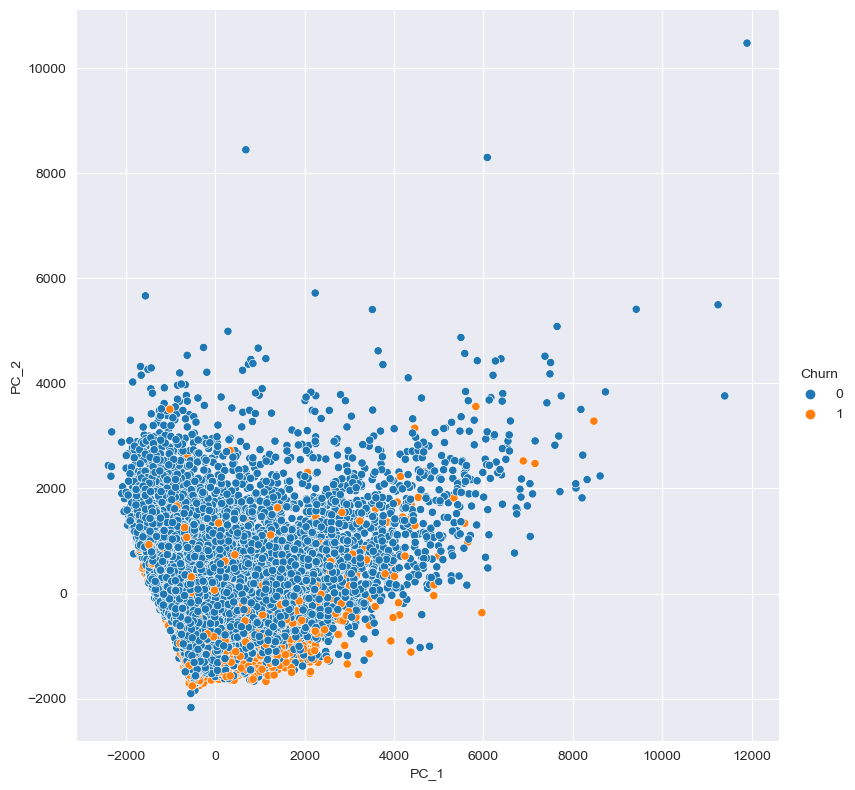

In [129]:
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Churn", size=8)
plt.show()

In [130]:
y_train_pca = data_train_pca.pop('Churn')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [131]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [132]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [133]:
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.578
Sensitivity: 0.933
Specificity:  0.545
Precision: 0.161
F1-score: 0.275

Test Performance :

Accuracy : 0.147
Sensitivity: 0.985
Specificity:  0.067
Precision: 0.092
F1-score: 0.168


In [134]:
# Creating a Logistic regression model using pca transformed train set
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [135]:
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [136]:
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [137]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [138]:
# Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.583
Sensitivity: 0.93
Specificity:  0.551
Precision: 0.162
F1-score: 0.276

Test Performance :

Accuracy : 0.155
Sensitivity: 0.979
Specificity:  0.076
Precision: 0.092
F1-score: 0.168


### MODEL 2 Summary

Train Performance :

    Accuracy : 0.583
    Sensitivity: 0.93
    Specificity:  0.551
    Precision: 0.162
    F1-score: 0.276

Test Performance :

    Accuracy : 0.155
    Sensitivity: 0.979
    Specificity:  0.076
    Precision: 0.092
    F1-score: 0.168

### Model 3 : Random Forest with PCA

In [139]:
# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.08602693602693602,
                                     1: 0.913973063973064},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [140]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08602693602693602,
                                                            1: 0.913973063973064},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [141]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0], dtype=int64)

In [142]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0], dtype=int64)

In [143]:
# PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.885
Sensitivity: 0.822
Specificity:  0.891
Precision: 0.413
F1-score: 0.55

Test Performance :

Accuracy : 0.892
Sensitivity: 0.055
Specificity:  0.971
Precision: 0.156
F1-score: 0.081


### MODEL 3 Summary

Train Performance :

    Accuracy : 0.885
    Sensitivity: 0.822
    Specificity:  0.891
    Precision: 0.413
    F1-score: 0.413

Test Performance :

    Accuracy : 0.892
    Sensitivity: 0.055
    Specificity:  0.971
    Precision: 0.156
    F1-score: 0.081

## Recommendations

##### Most important predictors of Churn , in order of importance and their coefficients are as follows:

    monthly_2g_8_1     -4.4332
    monthly_3g_8_1     -3.8982
    const               1.4828
    loc_og_t2f_mou_6   -0.5478
    monthly_3g_6_0     -0.4510
    std_og_t2f_mou_8   -0.4457
    sachet_2g_7_0      -0.2535
    total_rech_num_8   -0.1954
    sachet_2g_8_0      -0.1740
    monthly_2g_6_0     -0.1303
    total_rech_num_6    0.0758

From the above, The following can be infered

- The best model for predition of the churners was Logistic regression with PCA
- Customers still using 2g services are very less likely to churn for the telecom company
- Customers who churn show lower average monthly local incoming calls from fixed line in the action period by 0.55 standard deviations , compared to users who don't churn
- Customers relying on sachet recharges are also less likely to churn

Recomendations for the telecom company
- Focus more on customers with there 0.55 std deviations lower than the average incoming calls for fixed line
- Concentrate on users who recharge more number of times in the 6th month. They are most likely to churn. 